In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

In [3]:
data = np.load("condensed_impute_hap.npy")

In [4]:
data

array([[array([ 803, 1026, 1239, 1705])],
       [array([1576, 1626, 1659, 1902])],
       [array([214])],
       ..., 
       [array([1445])],
       [array([1252, 1526, 1567, 1580, 1688])],
       [ array([  10,   23,   25,   34,   38,   46,   48,   49,   52,   67,   74,
         78,   91,  109,  119,  123,  126,  127,  143,  154,  156,  164,
        167,  174,  176,  182,  186,  191,  192,  197,  198,  199,  201,
        202,  205,  211,  229,  245,  252,  262,  271,  275,  284,  288,
        313,  316,  323,  324,  326,  331,  333,  345,  348,  364,  417,
        451,  463,  466,  480,  489,  522,  551,  571,  574,  580,  585,
        589,  594,  605,  630,  651,  654,  659,  662,  679,  681,  683,
        695,  701,  720,  735,  740,  741,  745,  747,  779,  781,  790,
        797,  800,  801,  805,  816,  818,  819,  822,  823,  824,  830,
        833,  836,  840,  842,  843,  845,  851,  855,  856,  857,  859,
        872,  880,  881,  889,  894,  903,  910,  911,  919,  927,  9

In [17]:
data.shape

(824876, 1)

In [5]:
len(data)

824876

In [6]:
maxLen = max(len(p[0]) for p in data)

In [7]:
maxLen

2188

In [8]:
block_lengths = []
for p in data:
    block_lengths.append(len(p[0]))

In [9]:
all_zero = 0
for b in data:
    if len(b[0]) == 0:
        all_zero += 1

In [10]:
all_one = 0
for b in data:
    if len(b[0]) == maxLen:
        all_one += 1

In [11]:
print all_zero, all_one

6880 564


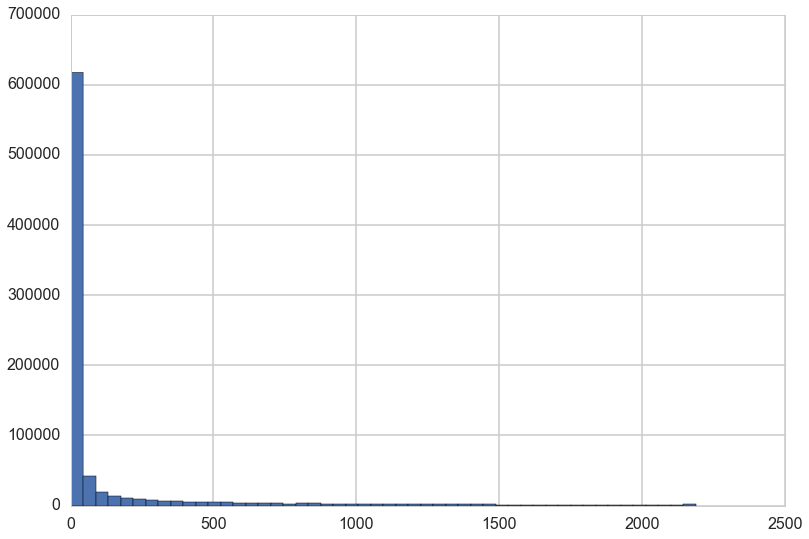

In [12]:
plt.hist(block_lengths, bins=50)
plt.show()

## try replace rows w/ all 1s w/ string indicator?

In [ ]:
'''
data2 = []
for block in data:
    if len(block[0]) == maxLen:
        data2.append("all_ones")
    else:
        data2.append(block)
np.save('full2.npy', data2)
'''

In [14]:
data_mat = np.zeros((len(data), maxLen))

In [18]:
%%time
for row in range(len(data)):
    for col in data[row]:
        data_mat[row,col] = 1

CPU times: user 6.41 s, sys: 4.93 s, total: 11.3 s
Wall time: 13.1 s


In [19]:
data_mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [29]:
# check if matrix created correctly
len(data[50][0]) == np.sum(data_mat[50,])

True

## try converting to csc?

In [44]:
from scipy.sparse import csc_matrix

In [33]:
len(data_mat[:,0])

824876

In [ ]:
'''
Takes forever to run...

row_indices = []
for col in range(maxLen):
    row_indices.append(np.nonzero(data_mat[:,col]))
'''

In [39]:
import os.path
print os.path.getsize('condensed_impute_hap.npy')

980695114


In [45]:
data_mat_csc = csc_matrix(data_mat)

In [46]:
import cPickle as pickle
with open('data_mat_csc.dat', 'wb') as outfile:
    pickle.dump(data_mat_csc, outfile, pickle.HIGHEST_PROTOCOL)

In [47]:
print os.path.getsize('data_mat_csc.dat')

1432712640
